In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Step 1:Importing Important libraries**

In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2: Uploading Dataset**

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/IRIS.csv')

**Step 3: Exploratory data analysis (EDA)**

In [ ]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Summary statistics
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

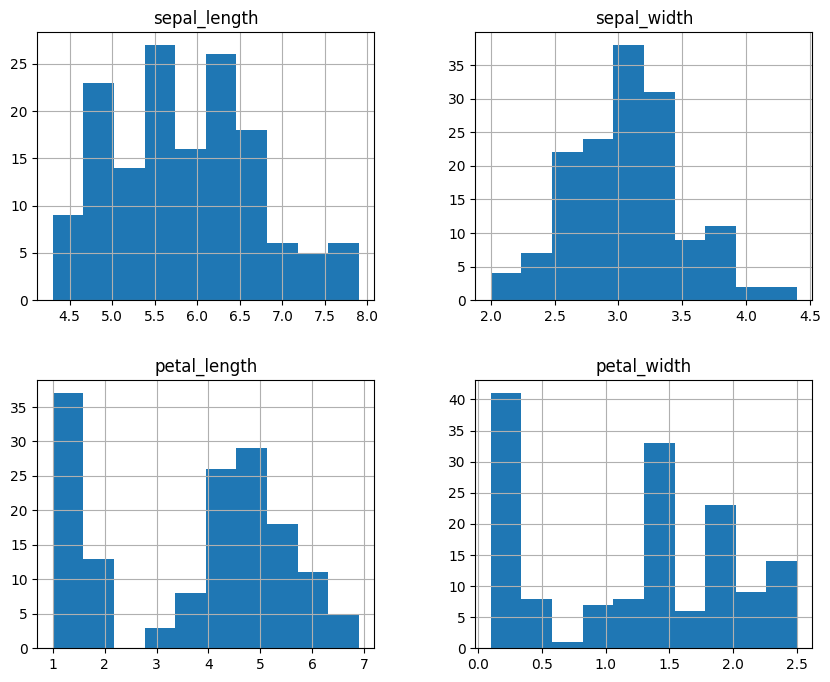

In [ ]:
# Histograms for each feature
df.hist(figsize=(10, 8))
plt.show()



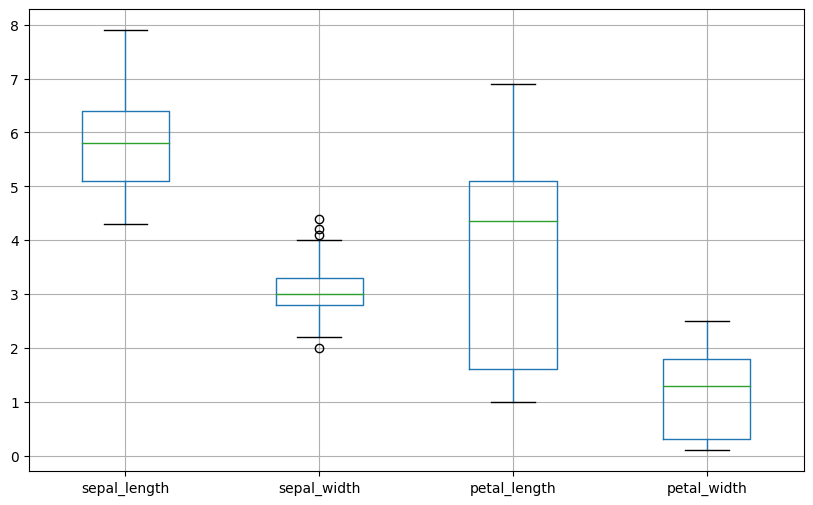

In [ ]:
# Box plots for each feature
df.boxplot(figsize=(10, 6))
plt.show()


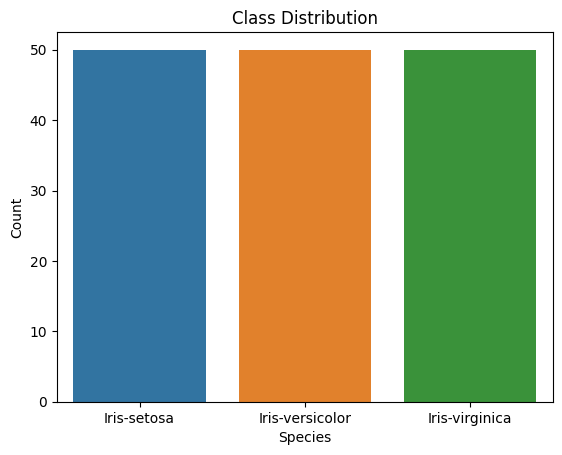

In [ ]:
# Class distribution
# Class distribution
sns.countplot(x='species', data=df)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<ipython-input-47-39cbbac68b4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


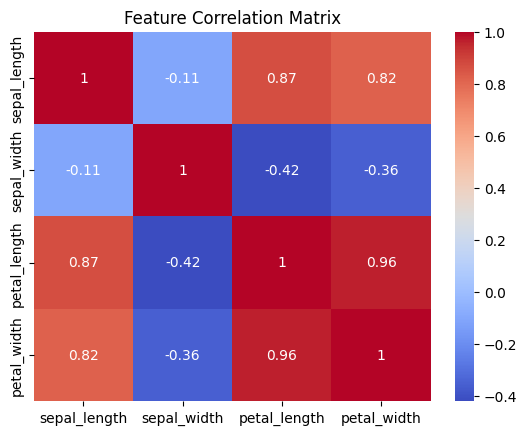

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**Step 4: Converting categorical data to integers**

In [ ]:
# Map string labels to integers for the 'species' column
label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
df['species'] = df['species'].map(label_mapping)



**Step 5: Dividing the dataset into features (X) and target (y)**

In [ ]:
# Use the columns 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' as features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

**Step 6: Dividing the dataset into train set(80%) and test set(20%)**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 7: Training and evaluating the model SVM,Decision Tree, Random forest and XGboost**

In [ ]:
# Define a function to train and evaluate multiple classifiers
def train_and_evaluate_classifiers(X_train, y_train, X_test, y_test):
    models = {}

    # Support Vector Machine (SVM) classifier
    svm_model = SVC(kernel='linear', C=1)
    svm_model.fit(X_train, y_train)
    models['SVM'] = svm_model

    # Decision Tree classifier
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    decision_tree_model.fit(X_train, y_train)
    models['DecisionTree'] = decision_tree_model

    # Random Forest classifier
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    models['RandomForest'] = random_forest_model

    # Gradient Boosting (XGBoost) classifier
    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    models['XGBoost'] = xgb_model

    results = {}

    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # Specify the target class names explicitly here
        classification_rep = classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'classification_report': classification_rep
        }

    return results

# Train and evaluate classifiers
results = train_and_evaluate_classifiers(X_train, y_train, X_test, y_test)

# Print accuracy and classification reports
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy: {metrics['accuracy']}")
    print(f"{model_name} Classification Report:\n{metrics['classification_report']}\n")

SVM Accuracy: 1.0
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


DecisionTree Accuracy: 1.0
DecisionTree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


RandomForest Accuracy: 1.0
RandomForest Classification Report:
                 precis

**Step 8: Confusion metrix to plot predict vs true values**

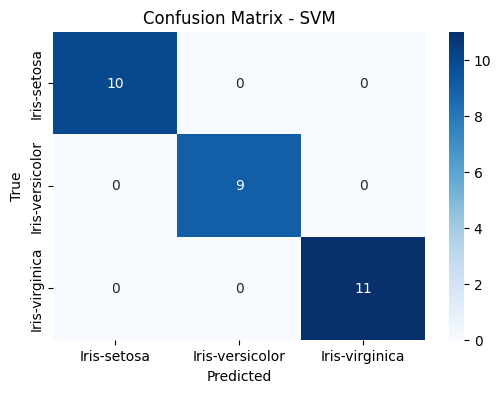

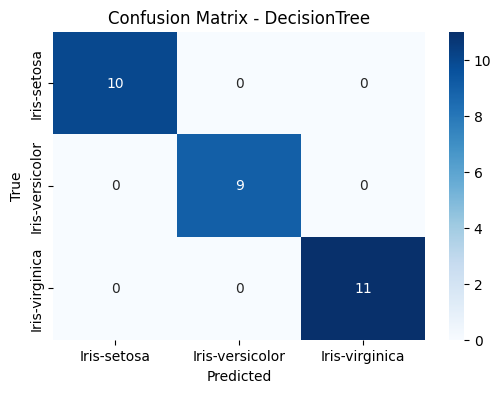

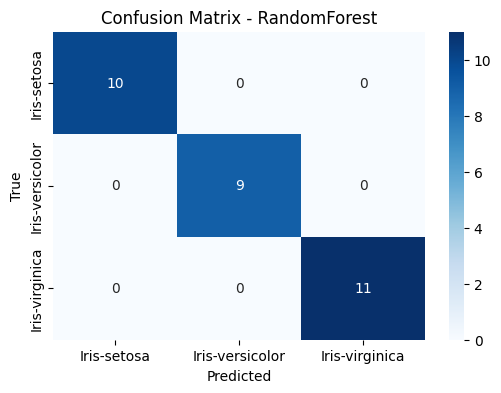

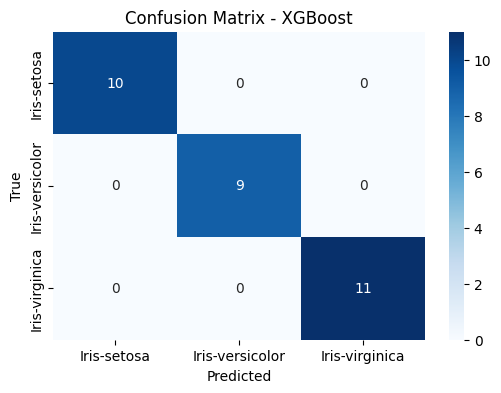

In [ ]:
# Define a function to plot confusion matrices
def plot_confusion_matrices(models, X_test, y_test):
    for model_name, model_info in models.items():
        model = model_info['model']
        y_pred = model.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                    yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()

# Train and evaluate classifiers
results = train_and_evaluate_classifiers(X_train, y_train, X_test, y_test)

# Plot confusion matrices
plot_confusion_matrices(results, X_test, y_test)

Observation: All the three models outperformed on this dataset with **Accuracy = 100%**